# Cuadernillo del desempeño de los alumnos

## Este cuaderno esta realizado con jupyter notebook el 18 de Enero del 2024 y la información esta actualizada hasta el 11 de Enero del 2024

### El cuaderno esta realizado por José de Jesús Hernández Vázquez

#### Los conjuntos de datos estan todos en kaggle.omc con el siguiente link: https://www.kaggle.com/datasets/mdismielhossenabir/psychosocial-dimensions-of-student-life

#### El conjunto de datos consiste en respuestas de una encuesta realizada a 100 estudiantes de informática. El objetivo de la encuesta es identificar correlaciones entre los niveles de depresión, rendimiento académico y patrones de TDAH (Trastorno por Déficit de Atención e Hiperactividad) a través del análisis de datos.

#### Las columnas en el conjunto de datos incluyen información sobre la edad, género, rendimiento académico, hábitos de estudio, estado de ánimo (presencia o ausencia de síntomas depresivos), afrontamiento de desafíos académicos, preferencias de presentación, horas de sueño diarias, número de amigos y receptividad a nuevas experiencias.

#### El conjunto de datos está diseñado para facilitar un análisis integral de la interacción entre factores demográficos, rendimiento académico, salud mental, hábitos de estudio y dinámicas sociales entre los individuos en el contexto específico de los estudiantes de informática.

#### Para este cuadernillo vamos a investigar lo siguiente:
1. Correlación entre la edad y el desempeño academico
2. Patrones relacionados al genero 
3. Relación entre tomar notas en clase y el desempeño academico
4. Impacto de la depresión en el desempeño academico
5. Desafios en completar las tareas academicas
6. Preferencias en estilos de aprendizaje
7. Patrones del sueño y desempeño academico 
8. Dinamicas sociales y desempeño academico
9. Adaptabilidad y apertura a la innovación

### Vamos a hacer las importaciones necesarias para poder realizar este proyecto

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr, kendalltau

### Importamos nuestros datos

In [2]:
df = pd.read_csv('assets/CSE_student_performances.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   99 non-null     int64  
 1   Gender                                99 non-null     object 
 2   AcademicPerformance                   99 non-null     object 
 3   TakingNoteInClass                     99 non-null     object 
 4   DepressionStatus                      99 non-null     object 
 5   FaceChallangesToCompleteAcademicTask  99 non-null     object 
 6   LikePresentation                      99 non-null     object 
 7   SleepPerDayHours                      99 non-null     int64  
 8   NumberOfFriend                        95 non-null     float64
 9   LikeNewThings                         99 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.9+ KB


#### Al darnos cuenta que hay valores vacios, haremos una limpieza para poder realizar con precisión nuestra investigación

In [3]:
df_clean = df.dropna()

In [4]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 1 to 98
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   95 non-null     int64  
 1   Gender                                95 non-null     object 
 2   AcademicPerformance                   95 non-null     object 
 3   TakingNoteInClass                     95 non-null     object 
 4   DepressionStatus                      95 non-null     object 
 5   FaceChallangesToCompleteAcademicTask  95 non-null     object 
 6   LikePresentation                      95 non-null     object 
 7   SleepPerDayHours                      95 non-null     int64  
 8   NumberOfFriend                        95 non-null     float64
 9   LikeNewThings                         95 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 8.2+ KB


In [5]:
df_clean['AcademicPerformance'].head()

1    Excellent
2      Average
3         Good
4      Average
5         Good
Name: AcademicPerformance, dtype: object

# Empezaremos por la correlación entre la edad y el desempeño academico

In [6]:
correlation_age_performance, _ = spearmanr(df_clean['Age '], df_clean['AcademicPerformance'])
print(f"Correlación entre la edad y el desempeño academico: {correlation_age_performance}")

Correlación entre la edad y el desempeño academico: -0.42022737421938255


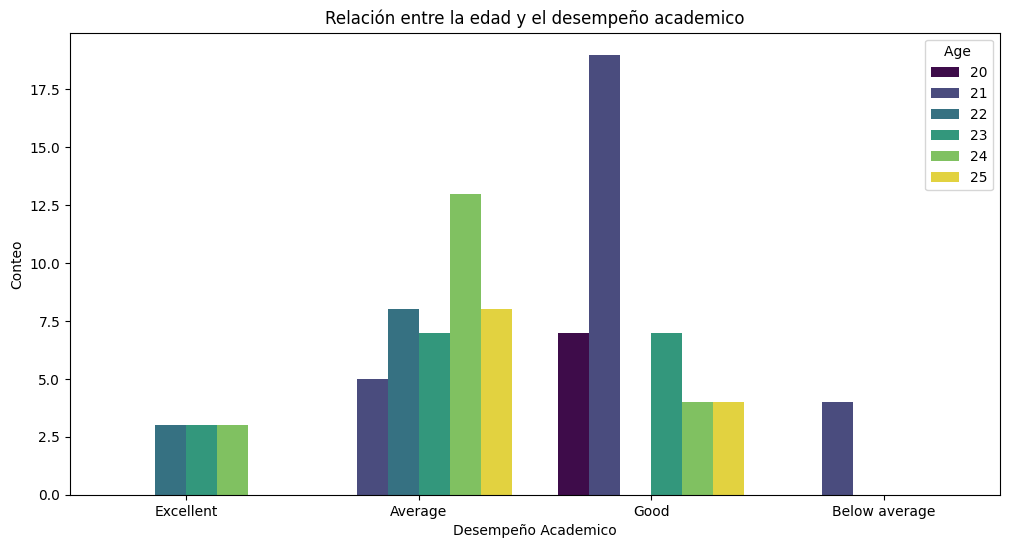

In [7]:
# Creamos un gráfico de barras agrupadas sin etiquetas de recuento
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, x='AcademicPerformance', hue='Age ', palette='viridis')

plt.title('Relación entre la edad y el desempeño academico')
plt.xlabel('Desempeño Academico')
plt.ylabel('Conteo')
plt.show()

#### Como podemos notar, la gente que tiene 22 años pertenece tanto al grupo como de excelente y promedio, sin embargo es más probable que sean promedio, por otro lado notamos una alta dominancia en la gente de 21 años para tener un buen desempeño, pero al mismo tiempo una porción de ellos se encuentra en debajo del promedio, por otro lado tambien vemos que la gente de 24 y 25 años tienden a formar parte del promedio

# Procedemos a los patrones relacionados al genero

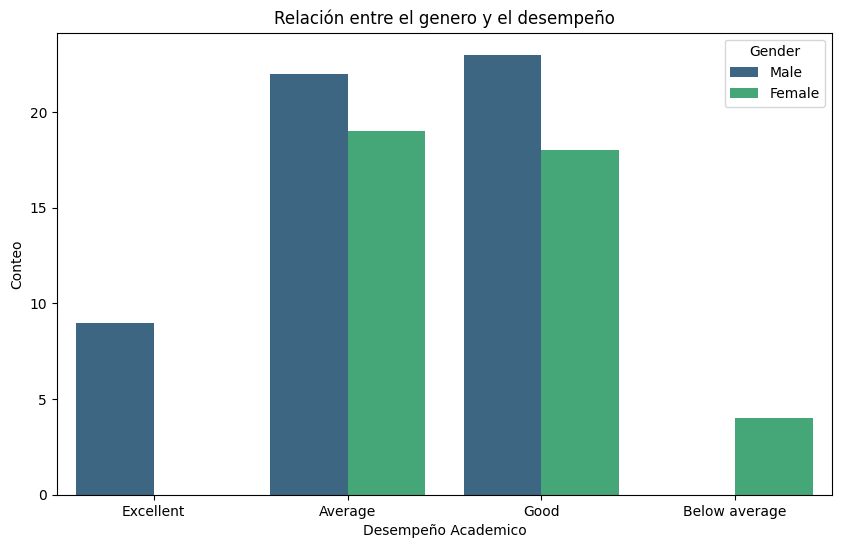

In [8]:
# Crear un gráfico de barras agrupadas para visualizar la relación entre Gender y AcademicPerformance
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='AcademicPerformance', hue='Gender', palette='viridis')

plt.title('Relación entre el genero y el desempeño')
plt.xlabel('Desempeño Academico')
plt.ylabel('Conteo')
plt.show()

#### Al desplegar nuestro gráfico podemos notar una alta dominancia por parte de los hombres con respecto al desempeño academico, de acuerdo a este conjunto de datos observamos que los hombres suelen ser mejores academicamente que las mujeres, sin embargo tenemos que tomar en cuenta un factor y es el porcentaje de alumnos del genero masculino y femenino en este conjunto de datos, como podremos observar en el siguiente gráfico

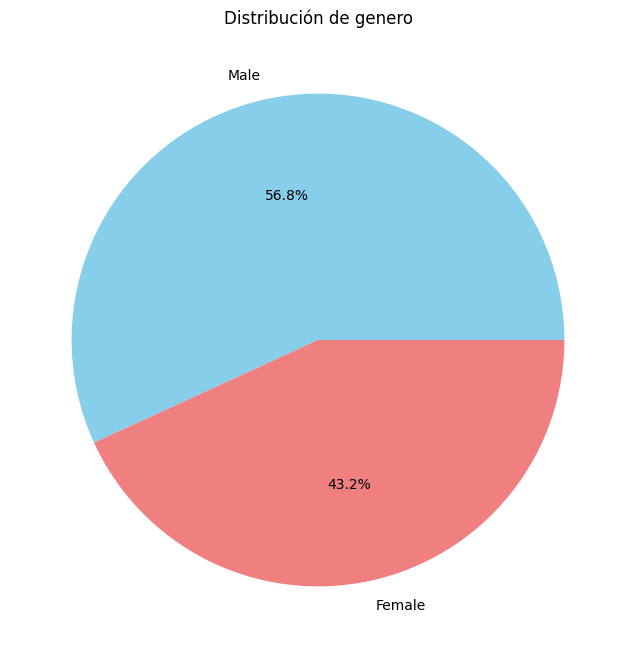

In [9]:
# Contar la frecuencia de cada valor en la columna 'Gender'
gender_counts = df_clean['Gender'].value_counts()

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribución de genero')
plt.show()

#### Verificamos que efectivamente, gran parte de los alumnos que forman parte del conjunto de datos son del genero masculino, entonces podría ser un factor tambien a considerar en cuestión de que genero es el que más se inscribe a las carreras de ciencias de la computación

# Procederemos a realizar la relación entre las personas que toman notas en clase con respecto a su desempeño academico

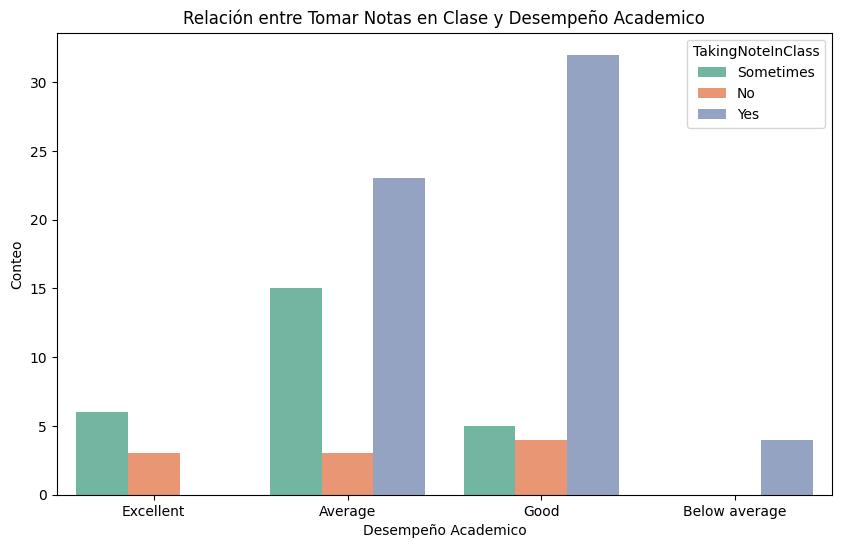

In [10]:
# Crear un gráfico de barras apiladas para visualizar la relación entre TakingNoteInClass y AcademicPerformance
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='AcademicPerformance', hue='TakingNoteInClass', palette='Set2')

plt.title('Relación entre Tomar Notas en Clase y Desempeño Academico')
plt.xlabel('Desempeño Academico')
plt.ylabel('Conteo')
plt.show()

#### Podemos observar que si tomas notas es más probable que tengas puntajes buenos o promedio, sin embargo el a veces tomar nota te daría más probabilidad de convertirte en un alumno promedio o excelente, y por otro lado las personas que no toman aunte suelen oscilar entre excelentes, buenos y promedio pero no presentan ninguna tendencia fuerte sobre alguno

# Despues de haber realizado esto, vamos a proceder a ver el impacto de la depresión con respecto al desempeño academico

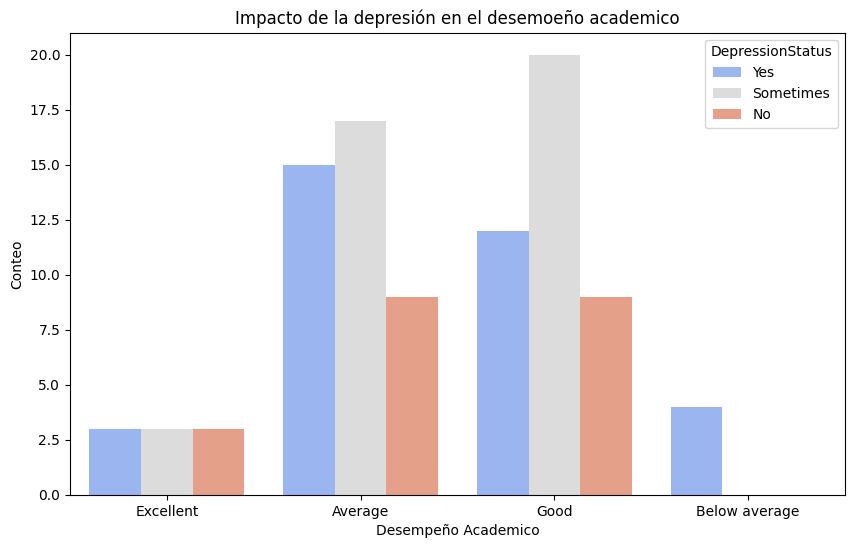

In [13]:
# Crear un gráfico de barras para visualizar el impacto de la depresión en el rendimiento académico
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='AcademicPerformance', hue='DepressionStatus', palette='coolwarm')

plt.title('Impacto de la depresión en el desemoeño academico')
plt.xlabel('Desempeño Academico')
plt.ylabel('Conteo')
plt.show()

#### En este punto podemos determinar que la gente que ha sufrido depresión o sufre depresión presenta una gran parte del grupo de los estudiantes promedio o buenos, sin embarago tambien hay una pequeña porción que son excelentes o debajo del promedio, pr otro lado, la gente que a veces muestra depresión es mayormente buena y promedio, y unicamente una pequeña porción de ellos es excelente, lo mismo pasa con la gente que no suffre depresión en lo absoluto, sin emabrgo la gente que no sufre de depresión ni siqueira a veces no se encuentra debajo del promedio

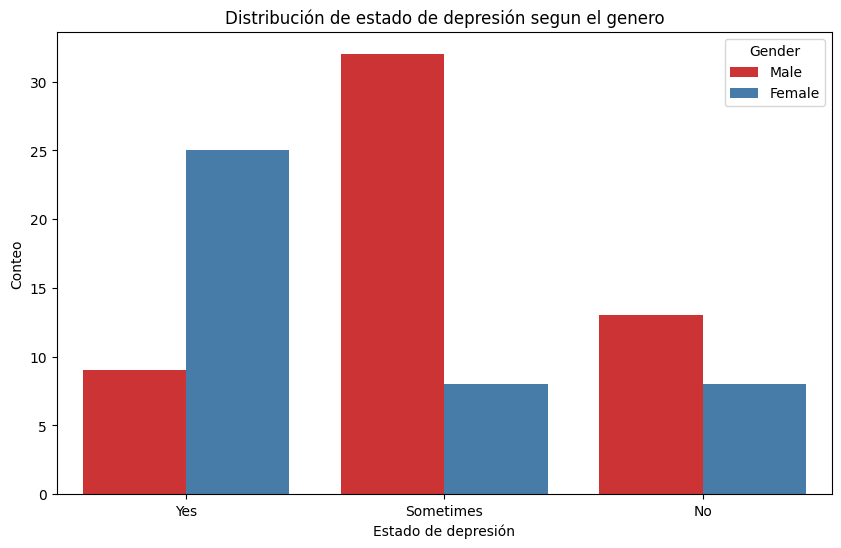

In [15]:
# Crear un gráfico de barras apiladas para visualizar la relación entre Gender y DepressionStatus
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='DepressionStatus', hue='Gender', palette='Set1')

plt.title('Distribución de estado de depresión segun el genero')
plt.xlabel('Estado de depresión')
plt.ylabel('Conteo')
plt.show()

#### A la hora de hacer un análisis más profundo podemos observar que las mujeres suelen sufrir más depresión que los hombres, ya que ellos presentan este estado unicamente a veces en su parte mayoritaria, lo cual podria dar a entender que existe más presión o factores externos que afectan mayormente a las mujeres que a los hombres

# Procedemos a realizar la relación entre el desempeño academico y la dificultad para terminar tareas academicas

In [17]:
df_clean

,Age,Gender,AcademicPerformance,TakingNoteInClass,DepressionStatus,FaceChallangesToCompleteAcademicTask,LikePresentation,SleepPerDayHours,NumberOfFriend,LikeNewThings
1,23,Male,Excellent,Sometimes,Yes,No,Yes,8,80.0,Yes
2,24,Male,Average,No,Sometimes,Sometimes,No,8,10.0,Yes
3,20,Female,Good,Yes,Sometimes,Yes,No,5,15.0,Yes
4,24,Female,Average,Yes,Yes,Yes,Yes,5,2.0,Yes
5,23,Male,Good,Sometimes,Sometimes,No,Yes,8,12.0,Yes
...,...,...,...,...,...,...,...,...,...,...
94,21,Male,Good,Yes,Sometimes,Yes,Yes,6,4.0,Yes
95,21,Female,Good,Yes,Yes,No,Yes,6,6.0,Yes
96,25,Male,Good,Yes,Sometimes,No,Yes,4,9.0,No
97,21,Male,Good,Yes,No,Sometimes,No,10,23.0,Yes


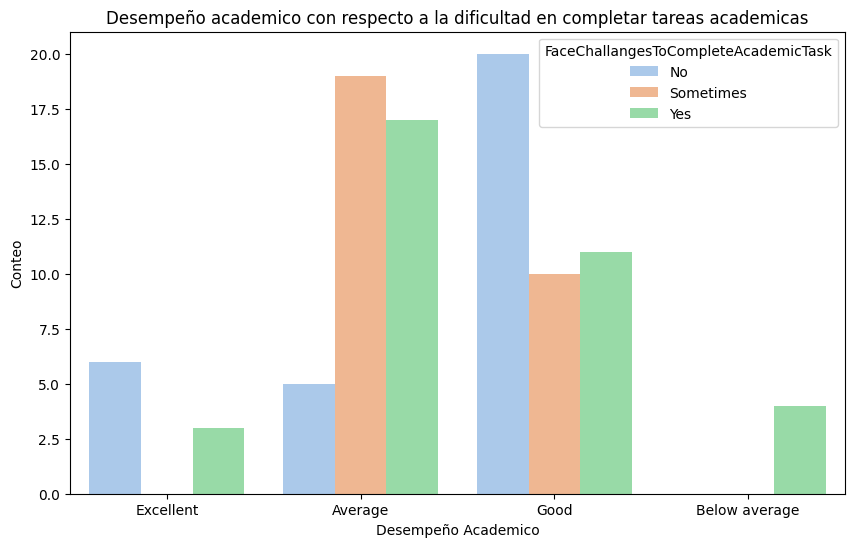

In [21]:
# Crear un gráfico de barras apiladas para visualizar la relación entre FaceChallengesToCompleteAcademicTask y AcademicPerformance
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='AcademicPerformance', hue='FaceChallangesToCompleteAcademicTask', palette='pastel')

plt.title('Desempeño academico con respecto a la dificultad en completar tareas academicas')
plt.xlabel('Desempeño Academico')
plt.ylabel('Conteo')
plt.show()

#### A sorpresa de lo que podria ser una gran parte de las personas, pensariamos que la gente que no tiene problemas con terminar su stareas serían excelentes alumnos en realidad en su mayor parte suelen ser buenos academicamente y los que a veces presentan dificultad son alumnos promedio al igual que aquellos que si tienen dificultades, y nos damos cuenta que no es por una diferencia muy significativa, por otro lado, unicamente los alumnos que presentan dificultad con sus tareas suelen ser debajo del promedio o excelentes, lo cual podría ser también un poco inesperado para la opinión general

# Vamos ahora a analizar el desempeño de los alumnos con respecto a sus preferencias de aprendizaje

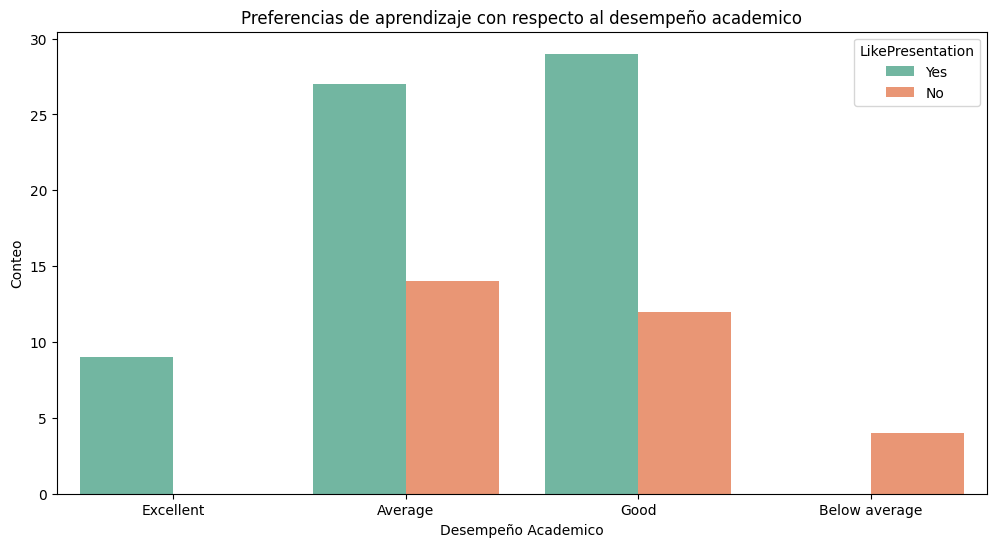

In [22]:
# Crear un gráfico de barras agrupadas para visualizar la relación entre LikePresentation y AcademicPerformance
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, x='AcademicPerformance', hue='LikePresentation', palette='Set2', dodge=True)

plt.title('Preferencias de aprendizaje con respecto al desempeño academico')
plt.xlabel('Desempeño Academico')
plt.ylabel('Conteo')
plt.show()

#### Vemos de este modo, que los alumnos que les gustan las presentaciones que se ofrecen por sus profesores suelen ser alumnos buenos o promeido, sin embargo aquellos que no les gustan suelen ser tambien buenos o promedio, entonces no existe una gran diferencia como tal, por otro lado los alumnos que no les gustan las presentaciones pueden estar debajo del promedio y los que si pueden ser tambien excelentes

# Ahora vamos a análisar los patrones del sueño con respecto a el desempeño de los alumnos

C:\Users\Josep\AppData\Local\Temp\ipykernel_13076\660213352.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=sleep_means.index, y=sleep_means, palette='coolwarm', ci='sd')  # Utilizamos 'ci' para especificar que se muestren las barras de error
C:\Users\Josep\AppData\Local\Temp\ipykernel_13076\660213352.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sleep_means.index, y=sleep_means, palette='coolwarm', ci='sd')  # Utilizamos 'ci' para especificar que se muestren las barras de error


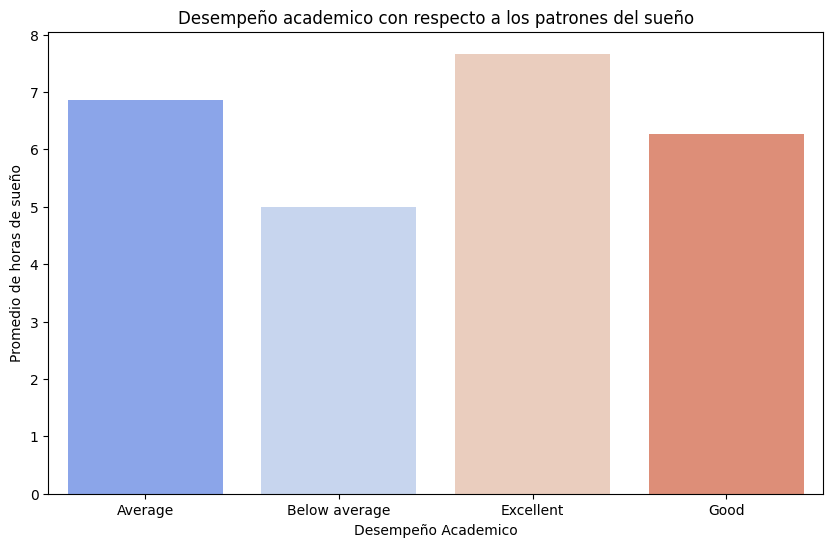

In [29]:
# Calcular las medias y desviaciones estándar de las horas de sueño para cada nivel de rendimiento académico
sleep_means = df_clean.groupby('AcademicPerformance')['SleepPerDayHours'].mean()
sleep_std = df_clean.groupby('AcademicPerformance')['SleepPerDayHours'].std()

# Crear un gráfico de barras con barras de error
plt.figure(figsize=(10, 6))
sns.barplot(x=sleep_means.index, y=sleep_means, palette='coolwarm', ci='sd')  # Utilizamos 'ci' para especificar que se muestren las barras de error

plt.title('Desempeño academico con respecto a los patrones del sueño')
plt.xlabel('Desempeño Academico')
plt.ylabel('Promedio de horas de sueño')
plt.show()

#### A partir de este grafico, completamos que en promedio los alumnos que duermen más de 7 horas suelen ser excelentes alumnos, menor a 7 horas son promedio y buenos, y los que duermen al menos 5 horas en promedio suelen ser alumnos debajo del promedio, por lo cual deducimos que es esencial dormir correctamente para poder desempeñarnos correctamente en nuestros estudios

# Procederemos a análisar como afectan las relaciones interpersonales en los alumnos y su desempeñol en la escuela

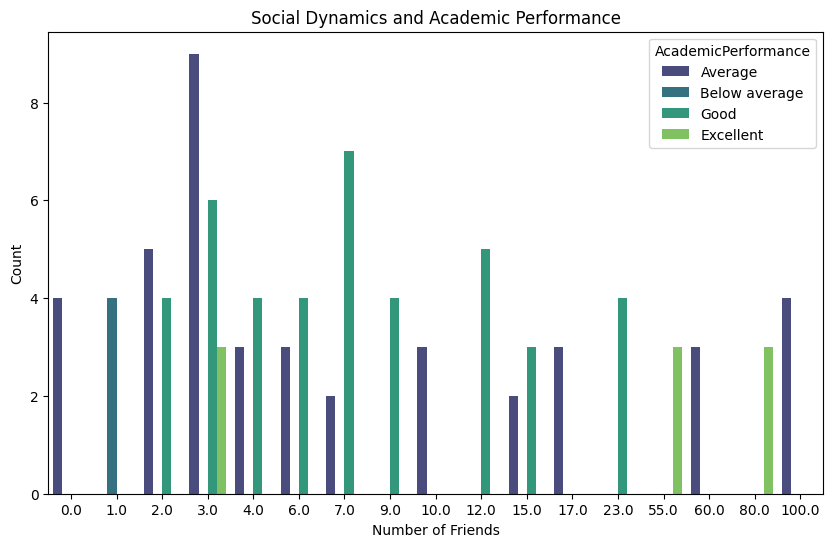

In [34]:
# Crear un gráfico de barras apiladas para visualizar la relación entre NumberOfFriend y AcademicPerformance
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='NumberOfFriend', hue='AcademicPerformance', palette='viridis')

plt.title('Social Dynamics and Academic Performance')
plt.xlabel('Number of Friends')
plt.ylabel('Count')
plt.show()

#### Apartir de este momento, notamos que la gente que tiene mayormente 3 amigos suelen ser alumnos promedio, y ños buenos alumnos suelen tener 7 amigos, por otro lado los que son excelentes suelen tener 3 o más de 50 amigos

# Continuaremos con analisar si los alumnos que se adaptan al cambio suelen ser mejores que aquellos que no

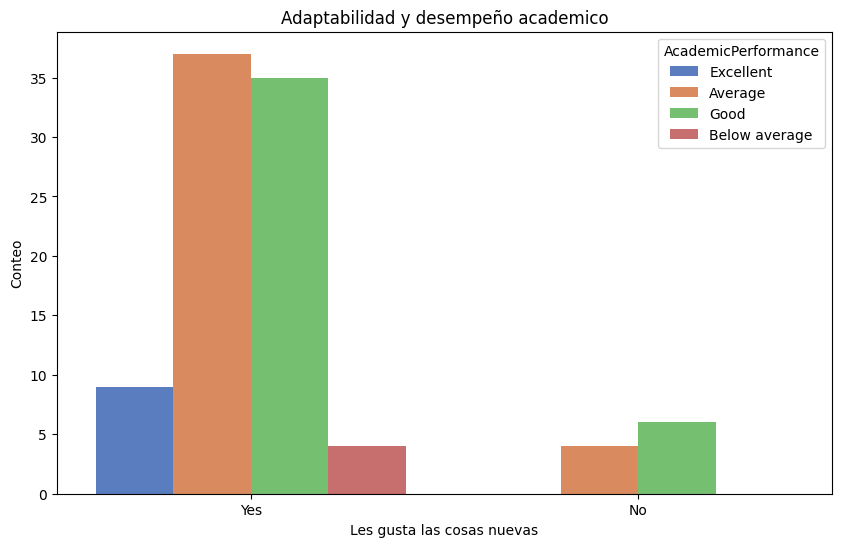

In [37]:
                                     # Crear un gráfico de barras apiladas para visualizar la relación entre LikeNewThings y AcademicPerformance
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='LikeNewThings', hue='AcademicPerformance', palette='muted')

plt.title('Adaptabilidad y desempeño academico')
plt.xlabel('Les gusta las cosas nuevas')
plt.ylabel('Conteo')
plt.show()                                                                                                       

#### Como podemos notar, los alumnos que son buenos o promedio tienden a ser más inclinados a aceptar el cambio, y una pequeña parte de ellos suelen no aceptarlo, lo que si es que los alumnos excelentes y abajo del promedio tambien suelen aceptar bien el cambio y adaptarse a el

### Después de esta investigación podemos comprender mejor los factores que afectan a los alumnos a la hora de tener un mejor rendimiento académico, ya sean factores externos de la universidad u otros internos, dándonos mejor comprensión de como podrían las universidades tener otro enfoque para ayudar a los alumnos a mejorar u ofrecer algún tipo de ayuda para tener alumnos mejor preparadas y con mejor desempeño, es importante destacar también que por parte de mi criterio personal, que desempeñarte excelente no significa tener más éxito en esta vida ni en tu carrera, pero por otro lado podría ayudar a comprender mejor tus gustos, intereses y ser un mejor profesionista en un futuro